<a href="https://colab.research.google.com/github/haviet12/DATE_5_AI/blob/main/water_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import skfuzzy as fu
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *

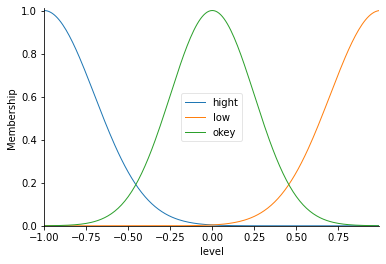

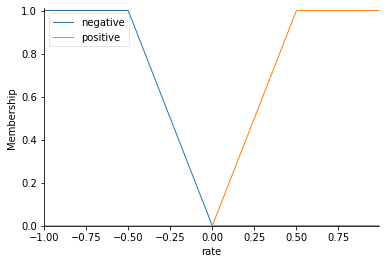

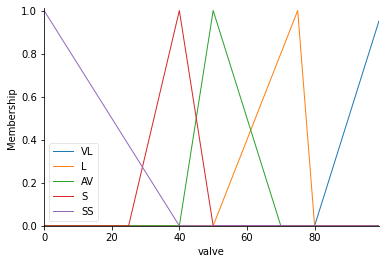

In [8]:
x=np.arange(-1,1,0.01)

level = ctrl.Antecedent(x,'level')
rate = ctrl.Antecedent(x,'rate')
valve = ctrl.Consequent(np.arange(0,100,1), 'valve')




### level
level["hight"]= fu.gaussmf(x,-1,0.3)
level["low"]= fu.gaussmf(x,1,0.3)
level["okey"]= fu.gaussmf(x,0,0.25)
level.view()

## rate
rate['negative']=fu.trapmf(x,[-5,-1,-0.5,0])
rate['positive']=fu.trapmf(x,[0,0.5,5,8])
rate.view()


## valve ( 0% -> 100%)
valve["VL"]= fu.trimf(valve.universe,[80,100,100])
valve["L"]= fu.trimf(valve.universe,[50,75,80])
valve["AV"]= fu.trimf(valve.universe,[40,50,70])
valve["S"]= fu.trimf(valve.universe,[25,40,50])
valve["SS"]= fu.trimf(valve.universe,[0,0,40])
valve.view()


In [11]:
r1= ctrl.Rule(level['okey']&rate['positive'], valve['L'])
r2=ctrl.Rule(level['low'], valve['VL'])
r3=ctrl.Rule(level['hight'], valve['SS'])
r4=ctrl.Rule(level['okey']&rate['negative'],valve['S'])

21.650856299806083


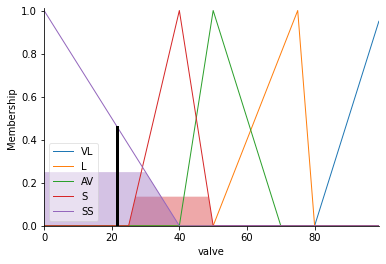

In [15]:
sys = ctrl.ControlSystem([r1,r2,r3,r4])
simu_sys= ctrl.ControlSystemSimulation(sys)
simu_sys.input['level']=-0.5
simu_sys.input['rate']=-1
simu_sys.compute()
print(simu_sys.output['valve'])
valve.view(simu_sys)

In [26]:
sim=ctrl.ControlSystemSimulation(sys,flush_after_run=10*10+1)
upsample=np.linspace(0,2,10)
x,y=np.meshgrid(upsample,upsample)
z=np.zeros_like(x)

In [27]:
for i in range(10):
  for j in range(10):
    sim.input['level']=x[i,j]
    sim.input['rate']=y[i,j]
    
    sim.compute()
    z[i,j]=sim.output['valve']

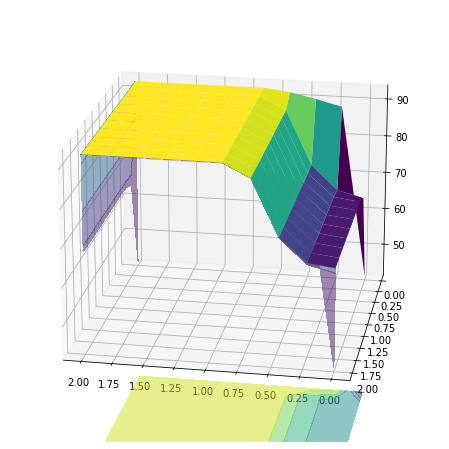

In [28]:
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis', linewidth=0.4,antialiased=True)
cset=ax.contourf(x,y,z,zdir='z', offset=9,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,z,zdir='y', offset=2,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,z,zdir='x', offset=2,cmap='viridis', alpha=0.5)
ax.view_init(20,100
             )